In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import folium
pd.set_option('display.max_columns', None)
import numpy as np
from sklearn import tree
import graphviz
from graphviz import Source
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import sklearn.metrics as met
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler


In [51]:
SAT_Scores = pd.read_csv("New_SAT__College_Board__2010_School_Level_Results.csv")

In [22]:
SAT_Scores.describe()

Number of Test Takers  Critical Reading Mean  Mathematics Mean  \
count             386.000000             386.000000        386.000000   
mean              103.658031             404.248705        412.935233   
std               145.264496              56.815631         64.990976   
min                 7.000000             291.000000        281.000000   
25%                35.000000             370.000000        372.000000   
50%                54.000000             392.500000        394.500000   
75%                92.750000             419.000000        429.750000   
max              1047.000000             674.000000        735.000000   

       Writing Mean  
count    386.000000  
mean     397.689119  
std       57.762584  
min      285.000000  
25%      364.000000  
50%      383.000000  
75%      414.000000  
max      678.000000

In [4]:
SAT_Scores.head(50)

DBN                                        School Name  \
0   01M292     Henry Street School for International Studies    
1   01M448               University Neighborhood High School    
2   01M450                   East Side Community High School    
3   01M458                      SATELLITE ACADEMY FORSYTH ST    
4   01M509                                  CMSP HIGH SCHOOL    
5   01M515           Lower East Side Preparatory High School    
6   01M539       New Explorations into Sci, Tech and Math HS    
7   01M650                              CASCADES HIGH SCHOOL    
8   01M696                    BARD HIGH SCHOOL EARLY COLLEGE    
9   02M047                       AMERICAN SIGN LANG ENG DUAL    
10  02M288                       FOOD AND FNANCE HIGH SCHOOL    
11  02M294                     HIGH SCHOOL FOR HIST AND COMM    
12  02M296             High School of Hospitality Management    
13  02M298                                  PACE HIGH SCHOOL    
14  02M300  Urban Assembly School of Design and Construction    
15  02M303                         The Facing History School    
16  02M305      Urban Assembly Academy of Government and Law    
17  02M308                      LOWER MANHATTAN ARTS ACADEMY    
18  02M313                          The James Baldwin School    
19  02M316  Urban Assembly School of Business for Young Wo...   
20  02M374                         GRAMERCY ARTS HIGH SCHOOL    
21  02M376                                       NYC iSchool    
22  02M400                     HIGH SCHOOL ENVRNMNTL STUDIES    
23  02M407             Institute for Collaborative Education    
24  02M408                Professional Performng Arts School    
25  02M411                 Baruch College Campus High School    
26  02M412    New York City Laboratory School Collab Studies    
27  02M413                              SCHOOL OF THE FUTURE    
28  02M414                       NEW YORK CITY MUSEUM SCHOOL    
29  02M416                     ELEANOR ROOSEVELT HIGH SCHOOL    
30  02M418                            Millennium High School    
31  02M419                                   LANDMARK SCHOOL    
32  02M420                       HIGH SCHOOL HLTH PROF HUMAN    
33  02M425                    HIGH SCHOOL LEADERSHIP PUB SVC    
34  02M429                     LEGACY SCH INTEGRATED STUDIES    
35  02M439                         MANHATTAN VILLAGE ACADEMY    
36  02M440              Bayard Rustin High School Humanities    
37  02M445                           Seward Park High School    
38  02M449                              VANGUARD HIGH SCHOOL    
39  02M459               MANHATTAN INTERNATIONAL HIGH SCHOOL    
40  02M460                     WASHINGTON IRVING HIGH SCHOOL    
41  02M473             YABC at Washington Irving High School    
42  02M475                            STUYVESANT HIGH SCHOOL    
43  02M489                       HS of Economics And Finance    
44  02M500                                 UNITY HIGH SCHOOL    
45  02M519                      TALENT UNLIMITED HIGH SCHOOL    
46  02M520                       MURRY BERGTRAUM HIGH SCHOOL    
47  02M529            Jacqueline Kennedy Onassis High School    
48  02M531                    NEW YORK CITY PUB SCH REP COMP    
49  02M535                             Park West High School    

    Number of Test Takers  Critical Reading Mean  Mathematics Mean  \
0                    31.0                  391.0             425.0   
1                    60.0                  394.0             419.0   
2                    69.0                  418.0             431.0   
3                    26.0                  385.0             370.0   
4                     NaN                    NaN               NaN   
5                   154.0                  314.0             532.0   
6                    47.0                  568.0             583.0   
7                    35.0                  411.0             401.0   
8                   138.0                  630.0             

Text(0, 0.5, 'Number of Schools')

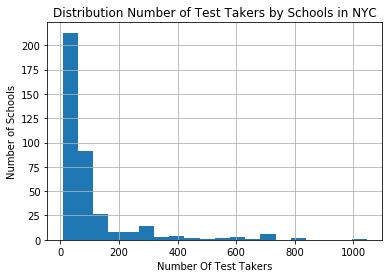

In [5]:
SAT_Scores["Number of Test Takers"].hist(bins=20)
plt.title("Distribution Number of Test Takers by Schools in NYC")
plt.xlabel("Number Of Test Takers")
plt.ylabel("Number of Schools")

Text(0, 0.5, 'Number of Schools')

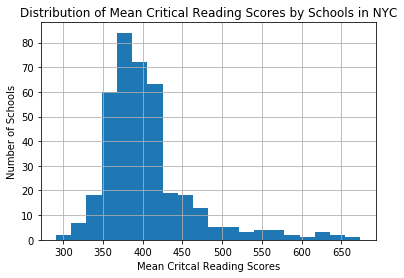

In [6]:
SAT_Scores["Critical Reading Mean"].hist(bins=20)
plt.title("Distribution of Mean Critical Reading Scores by Schools in NYC")
plt.xlabel("Mean Critcal Reading Scores")
plt.ylabel("Number of Schools")

Text(0, 0.5, 'Number of Schools')

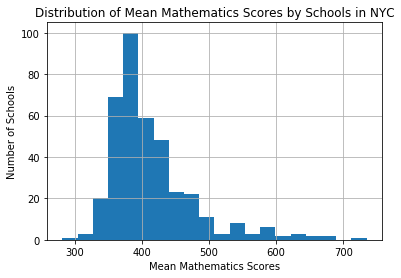

In [7]:
SAT_Scores["Mathematics Mean"].hist(bins=20)
plt.title("Distribution of Mean Mathematics Scores by Schools in NYC")
plt.xlabel("Mean Mathematics Scores")
plt.ylabel("Number of Schools")

Text(0, 0.5, 'Number of Schools')

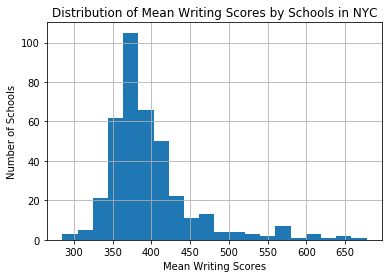

In [20]:
SAT_Scores["Writing Mean"].hist(bins=20)
plt.title("Distribution of Mean Writing Scores by Schools in NYC")
plt.xlabel("Mean Writing Scores")
plt.ylabel("Number of Schools")

In [20]:
SAT_Scores=pd.get_dummies(SAT_Scores, columns = ["Borough"], drop_first = True)


In [9]:
SAT_Scores.head(0)

Empty DataFrame
Columns: [DBN, School Name, Number of Test Takers, Critical Reading Mean, Mathematics Mean, Writing Mean, Borough_Brooklyn, Borough_Manhattan, Borough_Queens, Borough_Staten Island]
Index: []

In [36]:
lm = smf.ols("Q('Number of Test Takers') ~ Borough_Brooklyn + Borough_Manhattan + Borough_Queens + Q('Borough_Staten Island') + Q('Critical Reading Mean') + Q('Mathematics Mean') + Q('Writing Mean') ",SAT_Scores).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Q('Number of Test Takers')   R-squared:                       0.347
Model:                                    OLS   Adj. R-squared:                  0.335
Method:                         Least Squares   F-statistic:                     28.75
Date:                        Thu, 21 Nov 2019   Prob (F-statistic):           1.01e-31
Time:                                15:07:16   Log-Likelihood:                -2386.5
No. Observations:                         386   AIC:                             4789.
Df Residuals:                             378   BIC:                             4821.
Df Model:                                   7                                         
Covariance Type:                    nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   -351.6799     45.216     -7.778      0.000    -440.585    -262.774
Borough_Brooklyn              24.5818     16.138      1.523      0.129      -7.149      56.312
Borough_Manhattan            -28.4783     17.375     -1.639      0.102     -62.642       5.686
Borough_Queens                38.2948     20.072      1.908      0.057      -1.171      77.761
Q('Borough_Staten Island')    91.1829     40.818      2.234      0.026      10.924     171.442
Q('Critical Reading Mean')    -0.6594      0.529     -1.246      0.213      -1.700       0.381
Q('Mathematics Mean')          1.6921      0.223      7.585      0.000       1.253       2.131
Q('Writing Mean')              0.0384      0.541      0.071      0.943      -1.026       1.103
==============================================================================
Omnibus:                      161.290   Durbin-Watson:                   1.399
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              779.835
Skew:                           1.757   Prob(JB):                    4.58e-170
Kurtosis:                       9.012   Cond. No.                     5.58e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
errors = SAT_Scores["Number of Test Takers"] - lm.fittedvalues
squared_errors = errors**2
squared_errors.mean()

13734.014507018823

In [52]:
SAT_Scores=SAT_Scores.dropna()

In [22]:
X_input=SAT_Scores.drop(columns=["Number of Test Takers","School Name","DBN"])
X_input

Critical Reading Mean  Mathematics Mean  Writing Mean  Borough_Brooklyn  \
0                    391.0             425.0         385.0                 0   
1                    394.0             419.0         387.0                 0   
2                    418.0             431.0         402.0                 0   
3                    385.0             370.0         378.0                 0   
5                    314.0             532.0         314.0                 0   
6                    568.0             583.0         568.0                 0   
7                    411.0             401.0         401.0                 0   
8                    630.0             608.0         630.0                 0   
9                    405.0             415.0         385.0                 0   
10                   422.0             412.0         407.0                 0   
11                   382.0             364.0         366.0                 0   
12                   397.0             415.0         391.0                 0   
13                   424.0             448.0         423.0                 0   
14                   405.0             446.0         415.0                 0   
15                   381.0             373.0         377.0                 0   
16                   411.0             406.0         411.0                 0   
17                   409.0             381.0         412.0                 0   
18                   421.0             419.0         394.0                 0   
19                   401.0             409.0         391.0                 0   
20                   395.0             376.0         386.0                 0   
22                   465.0             480.0         448.0                 0   
23                   484.0             478.0         472.0                 0   
24                   495.0             465.0         499.0                 0   
25                   523.0             583.0         528.0                 0   
26                   561.0             597.0         567.0                 0   
27                   475.0             488.0         466.0                 0   
28                   454.0             448.0         435.0                 0   
29                   555.0             596.0         567.0                 0   
30                   512.0             554.0         523.0                 0   
31                   369.0             370.0         359.0                 0   
..                     ...               ...           ...               ...   
420                  429.0             402.0         403.0                 0   
421                  405.0             430.0         405.0                 0   
422                  406.0             412.0         391.0                 0   
423                  388.0             389.0         380.0                 0   
424                  383.0             371.0         370.0                 0   
426                  405.0             456.0         408.0                 0   
427                  418.0             434.0         408.0                 0   
428                  506.0             495.0         499.0                 0   
429                  440.0             452.0         424.0                 0   
430                  343.0             447.0         346.0                 0   
431                  502.0             505.0         515.0                 0   
432                  560.0             587.0         570.0                 0   
434                  508.0             523.0         502.0                 0   
435                  431.0             446.0         434.0                 0   
436                  437.0             442.0         425.0                 0   
437                  439.0             441.0         430.0                 0   
438                  459.0             482.0         467.0                 0   
439                  463.0             482.0         457.0                 0   
440  

In [23]:
y_input=SAT_Scores["Number of Test Takers"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_input, y_input, test_size=0.2)

In [37]:
reg = tree.DecisionTreeRegressor(max_depth = 2)

In [38]:
reg = reg.fit(X_train, y_train)

In [39]:
predictions = reg.predict(X_test)
predictions

array([ 50.49101796,  50.49101796, 105.83333333,  50.49101796,
       105.83333333,  50.49101796, 105.83333333,  50.49101796,
        50.49101796, 105.83333333, 229.51219512,  50.49101796,
       105.83333333, 229.51219512, 105.83333333,  50.49101796,
        50.49101796, 105.83333333, 229.51219512,  50.49101796,
       105.83333333,  50.49101796,  50.49101796,  50.49101796,
       105.83333333,  50.49101796, 105.83333333, 105.83333333,
        50.49101796,  50.49101796, 229.51219512,  50.49101796,
       105.83333333, 229.51219512,  50.49101796,  50.49101796,
        50.49101796, 105.83333333, 229.51219512,  50.49101796,
       105.83333333, 105.83333333,  50.49101796, 229.51219512,
       105.83333333,  50.49101796, 105.83333333, 105.83333333,
        50.49101796, 105.83333333, 105.83333333, 105.83333333,
        50.49101796, 229.51219512,  50.49101796, 105.83333333,
        50.49101796, 105.83333333,  50.49101796, 229.51219512,
        50.49101796, 105.83333333, 105.83333333,  50.49

In [40]:
SAT_MSE=((predictions - y_test)**2).mean()
SAT_MSE

20740.235502504103

[Text(167.4, 181.2, 'X[1] <= 468.0\nentropy = 19077.238\nsamples = 308\nvalue = 100.075'),
 Text(83.7, 108.72, 'X[1] <= 397.5\nentropy = 5618.639\nsamples = 263\nvalue = 70.692'),
 Text(41.85, 36.23999999999998, 'entropy = 1178.897\nsamples = 167\nvalue = 50.491'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 11397.139\nsamples = 96\nvalue = 105.833'),
 Text(251.10000000000002, 108.72, 'X[1] <= 651.0\nentropy = 63199.938\nsamples = 45\nvalue = 271.8'),
 Text(209.25, 36.23999999999998, 'entropy = 41882.689\nsamples = 41\nvalue = 229.512'),
 Text(292.95, 36.23999999999998, 'entropy = 75493.188\nsamples = 4\nvalue = 705.25')]

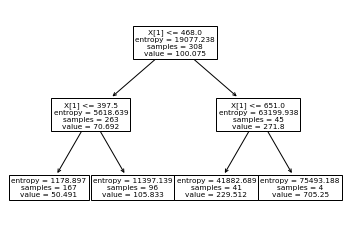

In [41]:
tree.plot_tree(reg)

Text(0, 0.5, 'Predicted Number Of Test Takers')

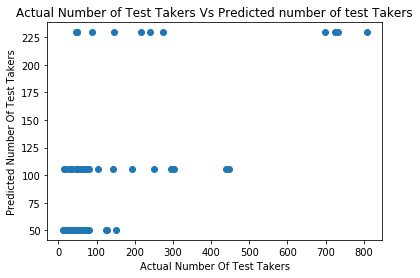

In [42]:
plt.scatter(y_test,predictions)
plt.title("Actual Number of Test Takers Vs Predicted number of test Takers")
plt.xlabel("Actual Number Of Test Takers")
plt.ylabel("Predicted Number Of Test Takers")

In [31]:
reg = tree.DecisionTreeRegressor(max_depth = 4)
reg = reg.fit(X_train, y_train)
predictions = reg.predict(X_test)
SAT_MSE=((predictions - y_test)**2).mean()
SAT_MSE

18260.342207111084

Text(0, 0.5, 'Predicted Number Of Test Takers')

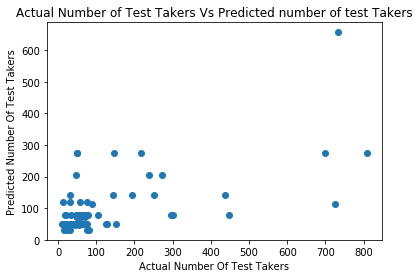

In [32]:
plt.scatter(y_test,predictions)
plt.title("Actual Number of Test Takers Vs Predicted number of test Takers")
plt.xlabel("Actual Number Of Test Takers")
plt.ylabel("Predicted Number Of Test Takers")

In [34]:
ik3nn1 = KNeighborsRegressor(n_neighbors = 4)
ik3nn1.fit(X_train, y_train)
iy_pred1 = ik3nn1.predict(X_test)

In [35]:
K_Nearest_MSE=((iy_pred1 - y_test)**2).mean()
K_Nearest_MSE

18222.12580128205

Text(0, 0.5, 'Predicted Number Of Test Takers')

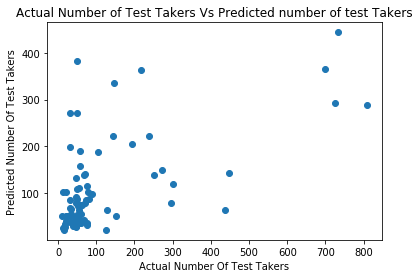

In [36]:
plt.scatter(y_test,iy_pred1)
plt.title("Actual Number of Test Takers Vs Predicted number of test Takers")
plt.xlabel("Actual Number Of Test Takers")
plt.ylabel("Predicted Number Of Test Takers")

In [49]:
SAT_Scores.head(0)

Empty DataFrame
Columns: [DBN, School Name, Number of Test Takers, Critical Reading Mean, Mathematics Mean, Writing Mean, Borough]
Index: []

In [53]:
Brooklyn_SAT=SAT_Scores[SAT_Scores["Borough"]=="Brooklyn"]

In [56]:
Manhattan_SAT=SAT_Scores[SAT_Scores["Borough"]=="Manhattan"]

In [58]:
MeanTest_Brooklyn=Brooklyn_SAT["Number of Test Takers"].mean()
MeanTest_Brooklyn

102.53211009174312

In [59]:
MeanTest_Manhattan=Manhattan_SAT["Number of Test Takers"].mean()
MeanTest_Manhattan

92.84693877551021

In [60]:
abs(MeanTest_Brooklyn-MeanTest_Manhattan)

9.68517131623291

In [64]:
Brooklyn_Manhattan_SAT=SAT_Scores[(SAT_Scores["Borough"]=="Brooklyn")|(SAT_Scores["Borough"]=="Manhattan")]

In [68]:
MyList=[]
for k in range(1,10000):
    Brooklyn_Manhattan_SAT["Number of Test Takers"]=np.random.permutation(Brooklyn_Manhattan_SAT["Number of Test Takers"])
    Brooklyn_SAT_P=Brooklyn_Manhattan_SAT[Brooklyn_Manhattan_SAT["Borough"]=="Brooklyn"]
    Manhattan_SAT_P=Brooklyn_Manhattan_SAT[Brooklyn_Manhattan_SAT["Borough"]=="Manhattan"]
    MeanTest_Brooklyn_P=Brooklyn_SAT_P["Number of Test Takers"].mean()
    MeanTest_Manhattan_P=Manhattan_SAT_P["Number of Test Takers"].mean()
    Dif=abs(MeanTest_Brooklyn_P-MeanTest_Manhattan_P)
    MyList.append(Dif)

/Users/jonahgreen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [69]:
MyList

[15.382419022654929,
 3.821568994570299,
 4.964894214566556,
 19.82812207451788,
 13.347687698932774,
 13.347687698932774,
 30.88513387006178,
 28.5403482493915,
 6.410222804718217,
 2.0193783935592506,
 12.386818947762592,
 22.87052986332148,
 20.79704175248081,
 18.47163452536978,
 19.199962553828883,
 17.057011795543914,
 11.456656056918192,
 10.17768208200711,
 9.917712038944018,
 13.657741995880926,
 1.119921363040632,
 7.3791424826811465,
 27.435779816513758,
 24.343287773825125,
 5.906384572177501,
 0.2171877925482164,
 18.909286650439995,
 18.85920239655495,
 9.092492042688633,
 58.50739561879797,
 8.71625163826998,
 21.4559071334956,
 18.8123946826437,
 33.683673469387756,
 38.60578543343942,
 18.781688822317918,
 5.576951881670098,
 31.60213443175435,
 24.8972102602509,
 9.673843849466394,
 11.14660175997004,
 10.778412282344135,
 21.359015165699304,
 5.003651001685071,
 26.474911065343562,
 1.6899457030518619,
 33.489889533795164,
 1.8062160644074083,
 16.46760906197342,
 4.

Text(0, 0.5, 'Frequency')

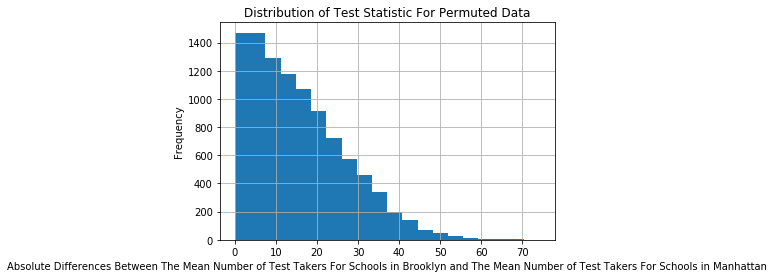

In [77]:
pd.Series(MyList).hist(bins=20)
plt.title("Distribution of Test Statistic For Permuted Data")
plt.xlabel("Absolute Differences Between The Mean Number of Test Takers For Schools in Brooklyn and The Mean Number of Test Takers For Schools in Manhattan")
plt.ylabel("Frequency")